In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [148]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,RobustScaler, PowerTransformer, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, ElasticNet, LassoLars, Lasso, RidgeCV,LassoCV,ElasticNetCV,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer


import xgboost as xgb
import lightgbm as lgb

from scipy import stats
from scipy.stats import norm, skew

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings('ignore')

### With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, Our model will predict the final price of each home.


Data fields
Here's a brief version of what you'll find in the data description file.

-  SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

### Data Preprocessing & Exploratory Data Analysis

In [53]:
#Importing train and test data
pd.options.mode.chained_assignment = None
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [108]:
#Joining two datasets
y = df_train["SalePrice"]
df = pd.concat([df_train,df_test],axis=0).drop(["SalePrice","Id"],axis=1)
df.shape

(2919, 79)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [10]:
print("Num of object columns {}".format(df.dtypes[df.dtypes==np.object].count()))
print("Num of float columns {}".format(df.dtypes[df.dtypes=='float64'].count()))
print("Num of int64 columns {}".format(df.dtypes[df.dtypes=='int64'].count()))



Num of object columns 43
Num of float columns 11
Num of int64 columns 25


In [11]:
#null values
df.isnull().sum()[df.isnull().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [109]:
#We drop these columns as they contains much more nulls
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],axis=1,inplace=True)

In [110]:
df["LotFrontage"] = df.groupby("Neighborhood").transform("median")["LotFrontage"]

In [111]:
#We can replace null values in this columns with None 
for col in ( 
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',\
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',\
               "MasVnrType",'MSSubClass'
               ):
    df[col].fillna("None",inplace=True)

In [112]:
#Filling other columns based on numeric or string columns
for i in df.isnull().sum()[df.isnull().sum()>0].index:
    if df[i].dtype==np.object:
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(0,inplace=True)
        
df = df.drop(['Utilities'], axis=1)

In [113]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

1.8828757597682129

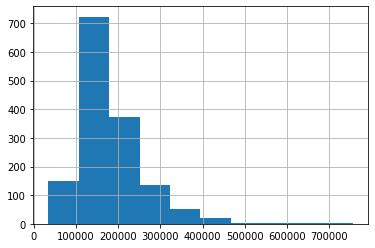

In [18]:
y.hist()
y.skew()

<AxesSubplot:>

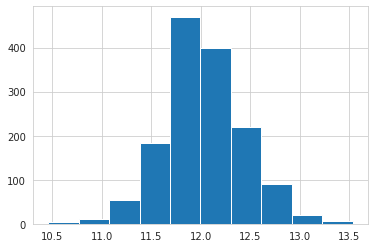

In [114]:
y = np.log1p(y)
y.hist()

## Feature Engineering

In [115]:
#Creating some useful columns by joining
df['exists_garage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['exists_bsmt']   = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df["OverallGrade"]  = df["OverallQual"] * df["OverallCond"]
df['Total_Bath']    = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                           4 : 2, 5 : 2, 6 : 2, # average
                                                           7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                          })
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['OverallQual'] = df['OverallQual'].astype(str)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(str)
df['GarageCars'] = df['GarageCars'].astype(str)
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype(str)
df['HalfBath'] = df['HalfBath'].astype(str)
    

In [116]:
#Cheking skew variables
from scipy.stats import norm, skew
numeric_feats = df.dtypes[df.dtypes != 'object'].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

MiscVal             21.947195
PoolArea            16.898328
LotArea             12.822431
LowQualFinSF        12.088761
3SsnPorch           11.376065
KitchenAbvGr         4.302254
BsmtFinSF2           4.146143
EnclosedPorch        4.003891
ScreenPorch          3.946694
BsmtHalfBath         3.931594
MasVnrArea           2.613592
OpenPorchSF          2.535114
WoodDeckSF           1.842433
TotalSF              1.511479
1stFlrSF             1.469604
BsmtFinSF1           1.425230
GrLivArea            1.269358
TotalBsmtSF          1.156894
BsmtUnfSF            0.919339
2ndFlrSF             0.861675
SimplOverallCond     0.844462
TotRmsAbvGrd         0.758367
Fireplaces           0.733495
BsmtFullBath         0.624832
YearBuilt           -0.599806
LotFrontage         -1.339588
exists_garage       -3.941054
exists_bsmt         -5.828995
dtype: float64

In [117]:
#Applying log1p normalization to most skewed values
for feature in high_skew.index:
    df[feature] = np.log1p(df[feature])

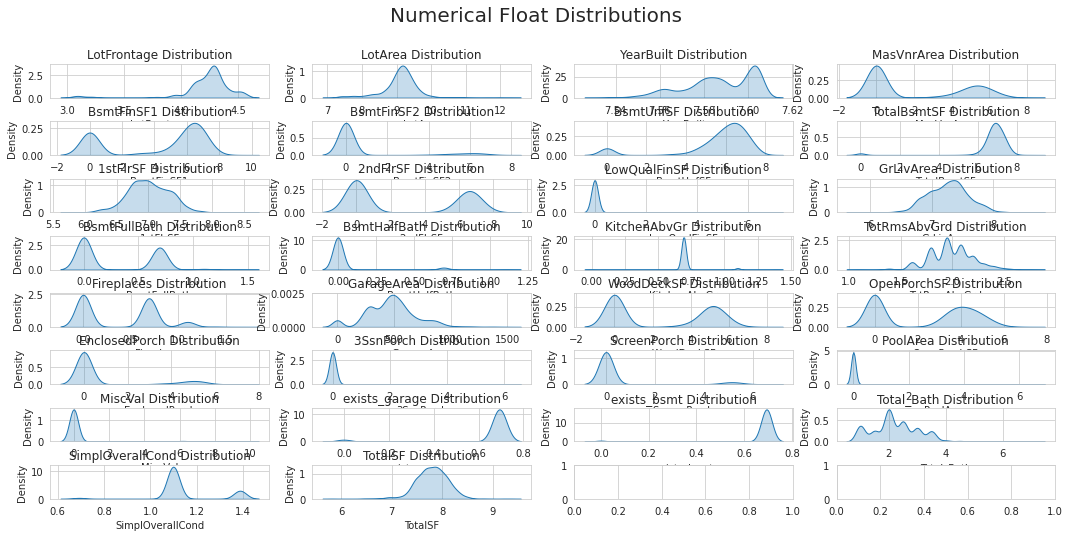

In [118]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(8,4, figsize=(18, 8));
plt.subplots_adjust(hspace = 0.7, wspace=0.2)
fig.suptitle('Numerical Float Distributions', fontsize=20)

# Take a look on the numerical distributions
a = len(df.select_dtypes('float').columns)  # number of rows

for i,col in zip(range(a),df.select_dtypes('float')):
    sns.kdeplot(df[col], ax=axes[i//4][i%4], fill= True);
    axes[i//4][i%4].set_title(col+' Distribution')

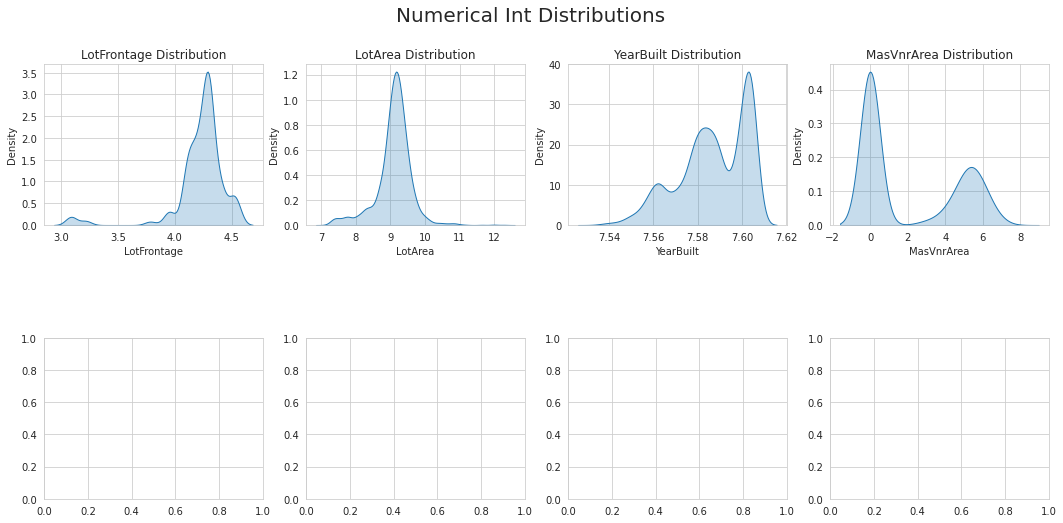

In [119]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2,4, figsize=(18, 8));
plt.subplots_adjust(hspace = 0.7, wspace=0.2)
fig.suptitle('Numerical Int Distributions', fontsize=20)

# Take a look on the numerical distributions
a = len(df.select_dtypes('int').columns)  # number of rows

for i,col in zip(range(a),df.select_dtypes('float')):
    sns.kdeplot(df[col], ax=axes[i//4][i%4], fill= True);
    axes[i//4][i%4].set_title(col+' Distribution')

In [120]:
train = df.iloc[:df_train.shape[0]] # train dataset with label
test = df.iloc[df_train.shape[0]:]  # test dataset without label

print(train.shape)
test.shape

(1460, 79)


(1459, 79)

In [121]:
#Encoder transformer based on one hot and robust.
object_feats  = train.dtypes[train.dtypes == "object"].index.tolist()
numeric_feats = train.dtypes[train.dtypes != "object"].index.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), object_feats),
        ('num', RobustScaler() , numeric_feats)
    ])

In [123]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,exists_garage,exists_bsmt,OverallGrade,Total_Bath,SimplOverallCond,TotalSF
0,60,RL,4.262680,9.042040,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,2,2008,WD,Normal,0.693147,0.693147,35,3.5,1.098612,7.850493
1,20,RL,4.394449,9.169623,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,5,2007,WD,Normal,0.693147,0.693147,48,2.5,1.386294,7.833996
2,60,RL,4.262680,9.328212,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,9,2008,WD,Normal,0.693147,0.693147,35,3.5,1.098612,7.903596
3,70,RL,4.262680,9.164401,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,2,2006,WD,Abnorml,0.693147,0.693147,35,2.0,1.098612,7.813592
4,60,RL,4.499810,9.565284,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,12,2008,WD,Normal,0.693147,0.693147,40,3.5,1.098612,8.114923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,4.174387,8.976894,Pave,Reg,Lvl,Inside,Gtl,Gilbert,...,8,2007,WD,Normal,0.693147,0.693147,30,2.5,1.098612,7.863651
1456,20,RL,4.394449,9.486152,Pave,Reg,Lvl,Inside,Gtl,NWAmes,...,2,2010,WD,Normal,0.693147,0.693147,36,3.0,1.098612,8.193124
1457,70,RL,4.262680,9.109746,Pave,Reg,Lvl,Inside,Gtl,Crawfor,...,5,2010,WD,Normal,0.693147,0.693147,63,2.0,1.386294,8.158516
1458,20,RL,4.304065,9.181735,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,4,2010,WD,Normal,0.693147,0.693147,30,2.0,1.098612,7.676474


# Modelling

#### Grid Search with Ridge

In [161]:
#Grid Search with Ridge
estimator = Pipeline([("pre", preprocessor),
        ("ridge_regression", Ridge())])

params = {
    'ridge_regression__alpha': [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15,17,20,25,26,27,29, 30,31,32,35, 80,90,100,110,120,130,150]
}

r_grid = GridSearchCV(estimator, params, cv=5)
r_grid.fit(train,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Street',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                            

In [162]:
print("Best score --",r_grid.best_score_)
print("Parameters --", r_grid.best_params_)
print("Mean square error --",mean_squared_error(y, r_grid.predict(train)))
print("R2 --",r2_score(y, r_grid.predict(train)))

Best score -- 0.9025910994894355
Parameters -- {'ridge_regression__alpha': 29}
Mean square error -- 0.0112606005929865
R2 -- 0.9293786772678582


#### Grid Search Lasso

In [163]:
estimator = Pipeline([("pre", preprocessor),
        ("lasso_regression", Lasso())])

params = {
    'lasso_regression__alpha': np.geomspace(0.0001,1,num = 35),
    'lasso_regression__max_iter':[5e4]
}

l_grid = GridSearchCV(estimator, params, cv=5)
l_grid.fit(train,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Street',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                            

In [164]:
print("Best score --",l_grid.best_score_)
print("Parameters --", l_grid.best_params_)
print("Mean square error --",mean_squared_error(y, l_grid.predict(train)))
print("R2 --",r2_score(y, l_grid.predict(train)))

Best score -- 0.9079970918479905
Parameters -- {'lasso_regression__alpha': 0.0006660846290809155, 'lasso_regression__max_iter': 50000.0}
Mean square error -- 0.011321892177805588
R2 -- 0.9289942845566054


#### Linear Regression with 2 degree Polynomials

In [149]:
pipe  = Pipeline([
                    ("scaler", preprocessor),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", LinearRegression())])

predictions = cross_val_predict(pipe, train, y, cv = 4)

In [150]:
print("Mean square error --",mean_squared_error(y, predictions))
print("R2 --",r2_score(y,predictions))

Mean square error -- 0.01880808703021981
R2 -- 0.8820443036615075


#### Stacking Regressor

In [151]:
estimators = [('forest', RandomForestRegressor(n_estimators=300,random_state=1)),
                ('kernel_ridge', KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)),
              ('Boosting', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber',random_state=1)),
              ('elasticnet', ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)),
              ( 'lasso', Lasso(alpha =0.0005, random_state=1)),
             ]
stack_reg = StackingRegressor(estimators = estimators, final_estimator = RandomForestRegressor(n_estimators = 400 ,random_state=1), n_jobs=-1)
clf = Pipeline(steps=[
                    ('pre', preprocessor),
                    ('stack', stack_reg),
                    ])
clf.fit(train, y)



Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'LotShape',
                                                   'LandContour', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQua...
                                                

In [154]:
print(r2_score(y,clf.predict(train)))
mean_squared_error(y, clf.predict(train))

0.9478048097771911


0.008322545758641017

In [170]:

pd.DataFrame([mean_squared_error(y, l_grid.predict(train)),mean_squared_error(y, r_grid.predict(train)),mean_squared_error(y, clf.predict(train)),mean_squared_error(y, predictions)],index=["Lasso","Ridge","Stacking","Linear"]).rename(columns={0:"MSE"})

,MSE
Lasso,0.011322
Ridge,0.011261
Stacking,0.008323
Linear,0.018808


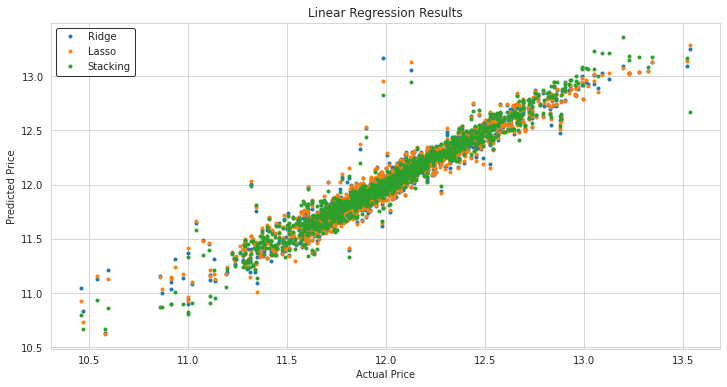

In [166]:
f = plt.figure(figsize=(12,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'Stacking']

models = [r_grid,l_grid,clf]

for mod, lab in zip(models, labels):
    ax.plot(y, mod.predict(train), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

### Conclusion 

#### Ridge Regression did a good job predicting house prices, however other models are close enough.

In [171]:

#pred = ridgeCV.predict(test)

col = np.expm1(clf.predict(test))
submission = pd.DataFrame({
        "Id": df_test.Id,
        "SalePrice": col
    })

submission.to_csv("reg3.csv")